## Desenvolvimento da 1a Etapa

### Função

In [2]:
import os
def read_directories(directory, img=None):
    # Get a list of filenames in the specified directory
    filenames = []
    for filename in os.listdir(directory):
        if img is not None:
            # If 'img' is provided, filter filenames containing it
            if img in filename:   
                filenames.append(filename)          
        else:
            filenames.append(filename)    
    return filenames

### Diretório das imagens

In [3]:
dir_images = f'work2/images_filtered'
dir_atlas = f'work2/atlas_resampled'
array_images = read_directories(dir_images)
array_atlas = read_directories(dir_atlas)

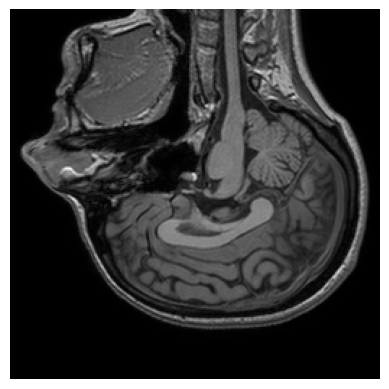

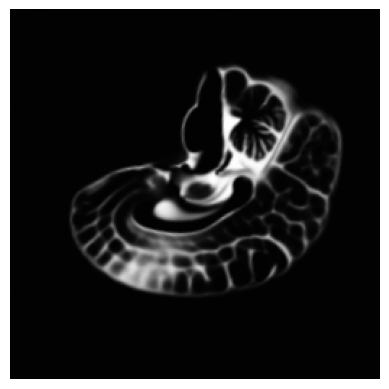

In [6]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

# Carregar a imagem
imagem = sitk.ReadImage("images_filtered/IXI002-Guys-0828-T1.nii.gz")
atlas_csf = sitk.ReadImage("atlas_resampled/IXI002-Guys-0828-T1.nii.gz/mni_csf.nii.gz")

# Converter para array numpy
array_imagem = sitk.GetArrayFromImage(imagem)
array_atlas = sitk.GetArrayFromImage(atlas_csf)

indice_fatia = array_imagem.shape[0] // 2  
fatia_img = array_imagem[indice_fatia, :, :]

indice_fatia = array_atlas.shape[0] // 2  
fatia_atlas = array_atlas[indice_fatia, :, :]


# Exibir a imagem
plt.imshow(fatia_img, cmap="gray")  # Use "gray" para imagens em preto e branco
plt.axis("off")  # Remove os eixos
plt.show()


# Exibir a imagem
plt.imshow(fatia_atlas, cmap="gray")  # Use "gray" para imagens em preto e branco
plt.axis("off")  # Remove os eixos
plt.show()

In [18]:

atlas_csf = sitk.ReadImage("atlas_resampled/IXI002-Guys-0828-T1.nii.gz/mni_csf.nii.gz")
atlas_gm = sitk.ReadImage("atlas_resampled/IXI002-Guys-0828-T1.nii.gz/mni_gm.nii.gz")
atlas_wm = sitk.ReadImage("atlas_resampled/IXI002-Guys-0828-T1.nii.gz/mni_wm.nii.gz")

atlas_csf_array = sitk.GetArrayFromImage(atlas_csf)
atlas_gm_array = sitk.GetArrayFromImage(atlas_gm)
atlas_wm_array = sitk.GetArrayFromImage(atlas_wm)


binary_array_csf = (atlas_csf_array > 0.98).astype(np.uint8)
binary_array_gm = (atlas_gm_array > 0.98).astype(np.uint8)
binary_array_wm = (atlas_wm_array > 0.98).astype(np.uint8)

# Converter de volta para imagem SimpleITK
binary_image_csf = sitk.GetImageFromArray(binary_array_csf)
binary_image_csf.CopyInformation(atlas_csf)  # Mantém metadados da imagem original

binary_image_gm = sitk.GetImageFromArray(binary_array_gm)
binary_image_gm.CopyInformation(atlas_gm)  # Mantém metadados da imagem original

binary_image_wm = sitk.GetImageFromArray(binary_array_wm)
binary_image_wm.CopyInformation(atlas_wm)  # Mantém metadados da imagem original


# num_pixels_1 = np.count_nonzero(binary_array)

# print(f"Número de pixels com valor 1: {num_pixels_1}")

sitk.WriteImage(binary_image_csf, "mni_csf_binary.nii.gz")
sitk.WriteImage(binary_image_gm, "mni_gm_binary.nii.gz")
sitk.WriteImage(binary_image_wm, "mni_wm_binary.nii.gz")

# # Exibir a imagem
# plt.imshow(fatia_binary_atlas, cmap="gray")  # Use "gray" para imagens em preto e branco
# plt.axis("off")  # Remove os eixos
# plt.show()
